Name: Gray Li
ID: 511104

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Section 1: Data Preparation

In [2]:
#1. Import data and examine a few row
df = pd.read_csv('train.csv')
print(df.head())

                               Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   New_Price  Price  
0        NaN   1.75  
1        NaN  12.50  
2  8.61 

In [3]:
#2) Look at the data types of the variables using dtypes.

print(df.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object


In [4]:
'''
3) To use them in a model, we need Engine and Power to be numeric. To make them numeric, you 
will need to strip out the text characters and convert the data type to numeric. Use the 
following code:
a. df1["Engine"] = df1["Engine"].str.rstrip(" CC")
b. df1["Power"] = df1["Power"].str.rstrip(" bhp")
c. df1["Power"] = df1["Power"].replace(regex="null", value = np.nan)
d. df1["Power"] = df1["Power"].astype("float")
e. df1["Engine"] = df1["Engine"].astype("float")
'''
df1 = df.copy()

df1["Engine"] = df1["Engine"].str.rstrip(" CC")
df1["Power"] = df1["Power"].str.rstrip(" bhp")
df1["Power"] = df1["Power"].replace(regex="null", value=np.nan)
df1["Power"] = df1["Power"].astype("float")
df1["Engine"] = df1["Engine"].astype("float")



In [5]:
print(df1.head())

                               Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage  Engine   Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998.0   58.16    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582.0  126.20    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199.0   88.70    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248.0   88.76    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968.0  140.80    5.0   

   New_Price  Price  
0        NaN   1.75  
1        NaN  12.50  
2  8.61 Lakh   4.50  
3        N

In [6]:
'''
4) Compute some summary statistics of the variables using describe(). Notice that the object 
variables do not appear in the describe() output. What do you notice when you examine the 
summary statistics? Hint: Look at the counts and compare means with medians.
'''
print(df1.describe())

              Year  Kilometers_Driven       Engine        Power        Seats  \
count  6019.000000       6.019000e+03  5983.000000  5876.000000  5977.000000   
mean   2013.358199       5.873838e+04  1621.276450   113.253050     5.278735   
std       3.269742       9.126884e+04   601.355233    53.874957     0.808840   
min    1998.000000       1.710000e+02    72.000000    34.200000     0.000000   
25%    2011.000000       3.400000e+04  1198.000000    75.000000     5.000000   
50%    2014.000000       5.300000e+04  1493.000000    97.700000     5.000000   
75%    2016.000000       7.300000e+04  1984.000000   138.100000     5.000000   
max    2019.000000       6.500000e+06  5998.000000   560.000000    10.000000   

             Price  
count  6019.000000  
mean      9.479468  
std      11.187917  
min       0.440000  
25%       3.500000  
50%       5.640000  
75%       9.950000  
max     160.000000  


In [7]:
'''
5) Because describe() will not provide information about the object variables, you will need to 
check whether there is missing data in those using a different method. Which variable had the 
most missing values?
'''
print(df1.isnull().sum())

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64


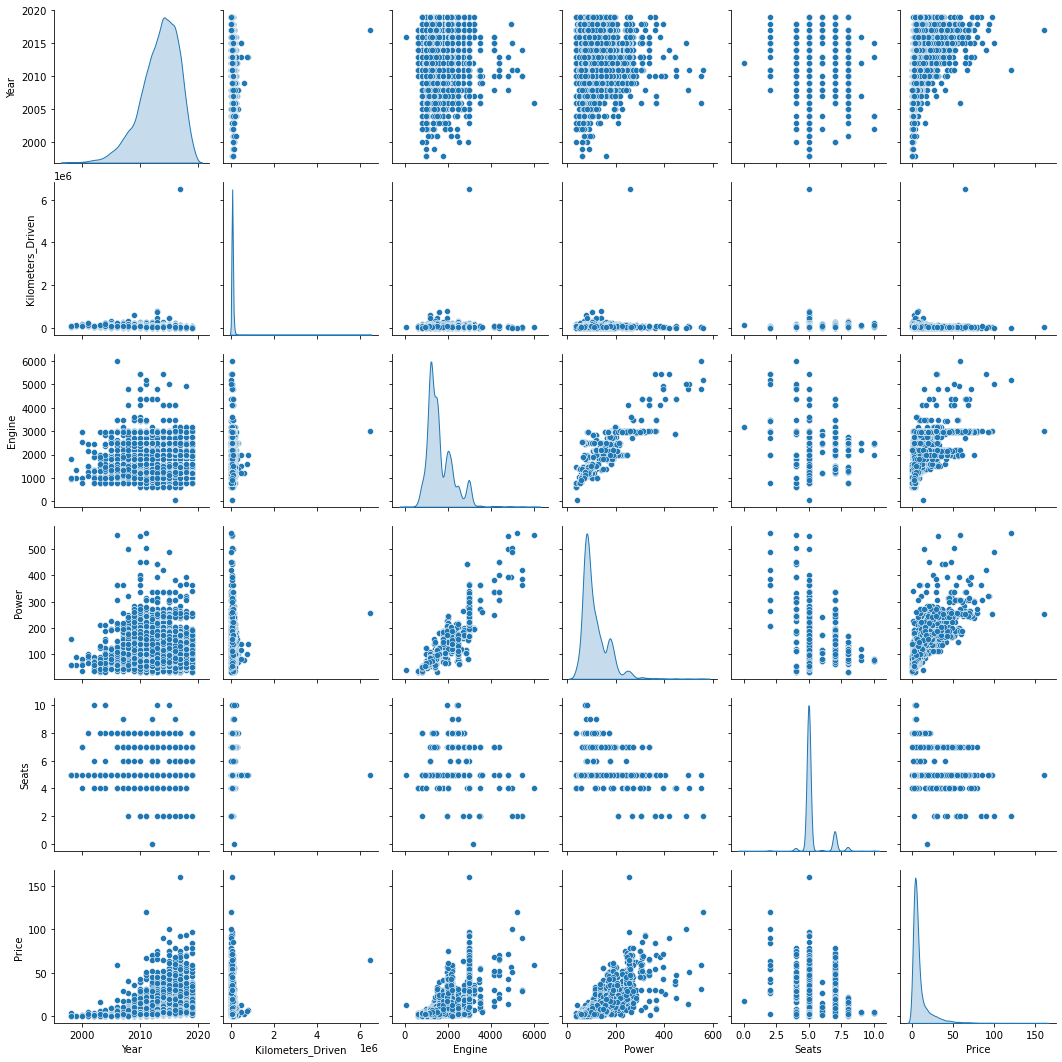

In [8]:
'''
6) Use pairplot() to examine the distributions and scatterplots of these variables. Do you see 
potential problems such as non-normal or potentially correlated data?
'''
sns.pairplot(df1, diag_kind='kde')
plt.show()

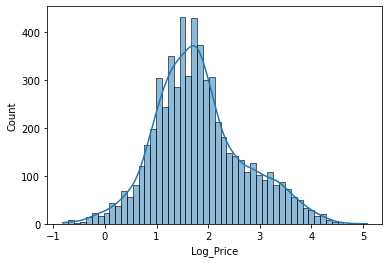

In [9]:
'''
7) Transform Price so that it looks more normal, then create a new plot of the transformed 
variable.
'''
#Applying logarithmic transformation to Price variable
df1['Log_Price'] = np.log(df1['Price'])

sns.histplot(df1['Log_Price'], kde=True)
plt.show()

Section 2: Predicting Used Car Prices

In [11]:
'''
1) Build a model of transformed price based on the other 4 variables. Be sure to examine both the 
output and the notes. You will get an error if any of the covariates have missing values. Hint: 
Only drop rows which have missing values in the variables you are using for the model.
a. How much variance is explained?
b. How many observations were used to fit the model?
'''
# Drop rows with missing values in the variables used for the model
model_df = df1[['Power', 'Engine', 'Kilometers_Driven', 'Year', 'Log_Price']].dropna()

# Split data into features (X) and target variable (y)
X = model_df[['Power', 'Engine', 'Kilometers_Driven', 'Year']]
y = model_df['Log_Price']

# Build and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X, y)

# Make predictions on the test set
y_pred = lr_model.predict(X)

# Compute R-squared to measure variance explained
variance_explained = r2_score(y, y_pred)
print(f"a.Variance Explained: {variance_explained}")
print(f"b.Number of Observations Used: {len(model_df)}")

a.Variance Explained: 0.8321998521653121
b.Number of Observations Used: 5876


In [14]:
'''
2) Based on your plots and the note about condition indices in the output, multicollinearity may be 
a problem. Compute the VIF of each variable. Which variables does it show are correlated?
'''

vif_data = X.copy()
vif_data['Constant'] = 1  # Add constant term for VIF calculation
vif = pd.DataFrame()
vif['Variable'] = vif_data.columns
vif['VIF'] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

print("VIF values:")
print(vif)


VIF values:
            Variable            VIF
0              Power       4.115131
1             Engine       4.156524
2  Kilometers_Driven       1.042054
3               Year       1.051550
4           Constant  425843.625194


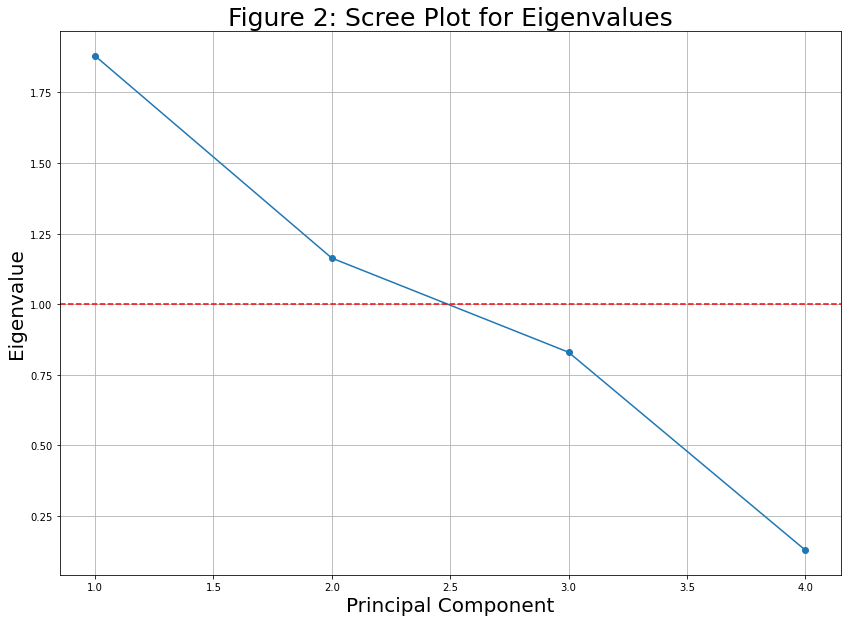

In [15]:
'''
3) Dimensionality reduction through PCA is one way to manage collinear variables. Use PCA to 
create principal components and create a scree plot. For this example, which criteria would you 
use to determine the number of components to use: proportion of variance, eigenvalues > 1, or 
elbow on the plot?
'''
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)
pca = PCA(n_components=4)
pca.fit(df_scaled)
eigenvalues = pca.explained_variance_
prop_var = eigenvalues / np.sum(eigenvalues)

plt.figure(figsize=(14,10))
plt.plot(np.arange(1, len(eigenvalues)+1), 
         eigenvalues, marker='o')
plt.xlabel('Principal Component',
           size = 20)
plt.ylabel('Eigenvalue',
           size = 20)
plt.title('Figure 2: Scree Plot for Eigenvalues',
          size = 25)
plt.axhline(y=1, color='r', 
            linestyle='--')
plt.grid(True)

In [16]:
'''
4) Create / select 2 components and rerun the regression with transformed price. What is the 
amount of variance explained?
a. When merging the transformed price onto the principal components dataframe, you will 
likely need to reset the index.
b. principalDf = pd.concat([principalDf, 
df1['lnPrice'].reset_index(drop=True)], axis = 1)
'''
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
principalDf = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principalDf = pd.concat([principalDf, model_df['Log_Price'].reset_index(drop=True)], axis=1)

# Split data into features (X) and target variable (y)
X_PCA = principalDf[['PC1', 'PC2']]
y_PCA = principalDf['Log_Price']

# Build and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_PCA, y_PCA)

# Make predictions on the test set
y_pred = lr_model.predict(X_PCA)

# Compute R-squared to measure variance explained
variance_explained = r2_score(y_PCA, y_pred)
print(f"a.Variance Explained: {variance_explained}")
print(f"b.Number of Observations Used: {len(principalDf)}")

a.Variance Explained: 0.738458655319787
b.Number of Observations Used: 5876


In [17]:
'''
5) What is the VIF of the components
'''
vif_data_pca = X_PCA.copy()
vif_data_pca['Constant'] = 1
vif_pca = pd.DataFrame()
vif_pca['Variable'] = vif_data_pca.columns
vif_pca['VIF'] = [variance_inflation_factor(vif_data_pca.values, i) for i in range(vif_data_pca.shape[1])]

print(vif_pca)

   Variable  VIF
0       PC1  1.0
1       PC2  1.0
2  Constant  1.0
